# Imports

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from random import randint

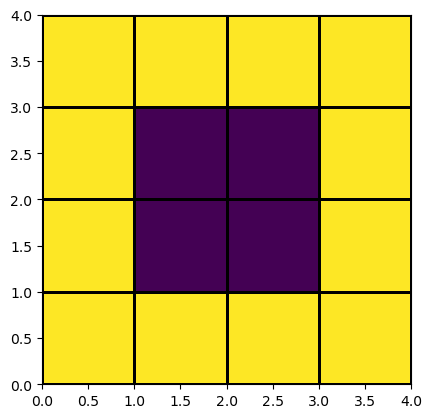

In [2]:
A = np.array([[1, 1, 1, 1],
              [1, 0, 0, 1],
              [1, 0, 0, 1],
              [1, 1, 1, 1]])

plt.pcolormesh(A, edgecolors='k', linewidth=1)
ax = plt.gca()
ax.set_aspect('equal')

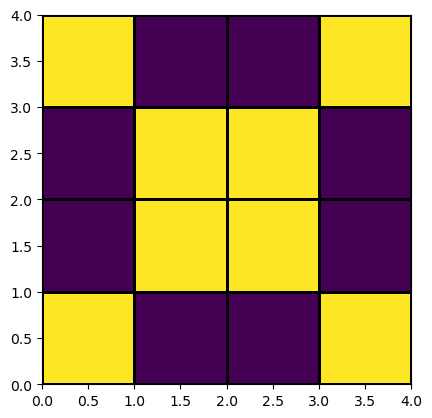

In [3]:
B = np.array([[1, 0, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 1, 0],
              [1, 0, 0, 1]])


plt.pcolormesh(B, edgecolors='k', linewidth=1)
ax = plt.gca()
ax.set_aspect('equal')

In [4]:
from copy import copy

def select_part(new_pattern, pattern):
    part = randint(1,4)
    if part == 1:
        new_pattern[0:2, 0:2] = pattern[0:2, 0:2]

    return new_pattern


X=[]
y=[]

n=2

for i in range(n):
    if i>n/2-1:
        new = A.copy()
        new = select_part(new, B)
        X.append(new)
        y.append([1, 0])
    else:
        new = B.copy()
        new = select_part(new, A)
        X.append(new)
        y.append([0, 1])
print(X)
print(y)

[array([[1, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]]), array([[1, 1, 1, 1],
       [1, 0, 0, 1],
       [1, 0, 0, 1],
       [1, 1, 1, 1]])]
[[0, 1], [1, 0]]


In [14]:


X = np.array([
    [[1, 1, 1, 1],
     [1, 0, 0, 1],
     [1, 0, 0, 1],
     [1, 1, 1, 1]],

    [[1, 1, 0, 0],
     [1, 0, 1, 0],
     [1, 0, 0, 1],
     [1, 1, 1, 1]],

    [[1, 0, 1, 1],
     [1, 1, 0, 1],
     [1, 1, 0, 1],
     [1, 0, 1, 1]],
    
    [[1, 1, 1, 1],
     [1, 0, 0, 1],
     [1, 0, 1, 1],
     [0, 1, 0, 1]],



     
     [[1, 1, 0, 1],
      [0, 0, 1, 0],
      [0, 1, 1, 0],
      [1, 0, 0, 1]],
     
     [[1, 0, 0, 1],
      [0, 1, 1, 0],
      [0, 1, 1, 1],
      [1, 0, 1, 1]],
     
     [[1, 0, 0, 1],
      [0, 1, 1, 0],
      [0, 0, 1, 0],
      [1, 1, 0, 1]],
     
     [[1, 0, 0, 1],
      [0, 1, 1, 0],
      [0, 1, 1, 0],
      [1, 0, 0, 1]]

])

y = np.array([
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],

    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
    ])


print(X.shape)
print(y.shape)

r_indexes = np.arange(len(X))
np.random.shuffle(r_indexes)

X = X[r_indexes]
y = y[r_indexes]

print(X.shape)
print(y.shape)

(8, 4, 4)
(8, 2)
(8, 4, 4)
(8, 2)


In [ ]:
print(X)
print("-----------------------")
print(y)

In [ ]:
def getMLP (X, y, activation="tanh", random=True, r=0.001, alpha=0):
    lastLoss = 1
    while lastLoss > .1:
        mlp = MLPClassifier(
                            solver='sgd',
                            shuffle=random,
                            activation=activation,
                            max_iter=500000,
                            tol=1e-10,
                            hidden_layer_sizes=(2,),
                            momentum=alpha,
                            learning_rate_init=r)
        mlp.fit(X, y)
        lastLoss = np.array(mlp.loss_curve_).min()
    
    print('Score: ', mlp.score(X, y))
    print('Number of iterations: ', mlp.n_iter_)
    print('Loss: ', lastLoss)
    return mlp

def plot(X, y, mlp, r=0.05, alpha=0):
    # Plot - Loss Curve
    losses = mlp.loss_curve_
    plt.plot(losses)
    plt.title("Loss (r = " + str(r) + ", alpha = " + str(alpha) + ")")
    plt.show()
    
    # Plot - Confusion Matris
    fig = ConfusionMatrixDisplay.from_estimator(mlp, X, y)
    fig.figure_.suptitle("Matriz de confusao")
    plt.show()

In [ ]:
mlp = getMLP(X=X, y=y, _activation='tanh', alpha=1)
plot(X=X[:3], y=y[:3] , mlp=mlp)
ypred = mlp.predict(X)
clr = classification_report(y, ypred)
print("Classification Report:\n----------------------\n", clr)

In [ ]:
mlp = getMLP(X=X, y=y, _activation='relu', alpha=1)
plot(X=X[:3], y=y[:3] , mlp=mlp)
ypred = mlp.predict(X)
clr = classification_report(y, ypred)
print("Classification Report:\n----------------------\n", clr)

In [ ]:
mlp = getMLP(X=X, y=y, _activation='logistic', alpha=1)
plot(X=X[:3], y=y[:3] , mlp=mlp)
ypred = mlp.predict(X)
clr = classification_report(y, ypred)
print("Classification Report:\n----------------------\n", clr)

In [ ]:
mlp = getMLP(X=X[:3], y=y[:3], _activation='identity', alpha=1)
plot(X=X[:3], y=y[:3] , mlp=mlp)
ypred = mlp.predict(X[3::])
clr = classification_report(y[3::], ypred)
print("Classification Report:\n----------------------\n", clr)